# Plot Phase Tensor Ellipses and Tippers

Fei Zhang

2018-10-23

In [1]:
import os
import sys
import glob
import fnmatch
from mtpy.utils.shapefiles_creator import ShapeFilesCreator

2018-10-31T12:25:52 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set


In [2]:
def recursive_glob(dirname, ext='*.edi'):
    """
    Under the dirname recursively find all files with extension ext.
    Return a list of the full-path to the types of files of interest.
    
    This function is useful to handle a nested directories of EDI files.
    
    :param dirname: a single dir OR a list of dirs.
    :param ext: eg, ".xml"
    :return: a list of path2files
    """

    if isinstance(dirname, (list,)): # the input argument is a list of directory
        filelist = []
        for adir in dirname:
            filelist.extend(recursive_glob(adir))
        return filelist
    else: # input variable is a single dir
        matches = []
        for root, dirnames, filenames in os.walk(dirname):
            for filename in fnmatch.filter(filenames, ext):
                matches.append(os.path.join(root, filename))
        return matches

In [62]:
EDI_DIR=r'C:\mtpywin\mtpy\examples\data\edi_files_2'
# EDI_DIR=r'C:\mtpywin\mtpy\examples\data\edi_files' # no tipper
# EDI_DIR = 'E:/Data/MT_Datasets/3D_MT_data_edited_fromDuanJM'
# EDI_DIR = r"E:\Data\MT_Datasets\GA_UA_edited_10s-10000s"
# EDI_DIR = r"E:\Data\MT_Datasets\Isa_EDI_edited_10Hz_1000s"
# EDI_DIR = r"E:\Data\MT_Datasets\728889\EDI_files" # narrow area, not shown
# EDI_DIR = r"E:\Data\MT_Datasets\75098\EDI_files"  # cross UTM zones 51 and 52, No tippers?
# EDI_DIR =r"E:\Data\MT_Datasets\75099_Youanmi\EDI_Files_edited"

edifiles=recursive_glob(EDI_DIR)

print("Number of EDI files found = %s"%len(edifiles))

Number of EDI files found = 28


In [63]:
shpobj = ShapeFilesCreator(edifiles, "c:/tmp20181023")

2018-10-31T12:47:39 - mtpy.core.edi_collection - INFO - number of edi files in this collection: 28
number of stations/edifiles = 28
2018-10-31T12:47:39 - mtpy.core.edi_collection - INFO - Number of MT Periods: 148
count    378.000000
mean       1.790123
std        1.200137
min        0.185184
25%        0.740742
50%        1.666667
75%        2.592593
max        5.000000
dtype: float64
2018-10-31T12:47:40 - mtpy.core.edi_collection - INFO - 1,2,3,4 5 Percentile distances: 0.185184444445, 0.185184444445, 0.185184444445, 0.185184444445, 0.18518666667


In [64]:
allper=shpobj.all_unique_periods

In [65]:
i=10
gpd_phtensor = shpobj.create_phase_tensor_shp(allper[i],export_fig=True)[0]

2018-10-31T12:47:40 - mtpy.core.edi_collection - INFO - Automatically Selected Max-Ellispse Size = 0.0925922222226
The plot period is  0.00023442267204807352
64.27145227926553
2018-10-31T12:47:40 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set
2018-10-31T12:47:40 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set
2018-10-31T12:47:40 - mtpy.core.edi_collection - INFO - Geopandas Dataframe CRS: {'init': 'epsg:4283', 'no_defs': True}
{'MinLat': -22.01, 'MaxLon': 140.01, 'MinLon': 136.01, 'MaxLat': -19.01}
2018-10-31T12:47:40 - mtpy.utils.shapefiles_creator - INFO - saving figure to file c:/tmp20181023\Phase_Tensor_EPSG_4283_Period_0.00023442267204807352s.jpg


In [66]:
type(gpd_phtensor)

geopandas.geodataframe.GeoDataFrame

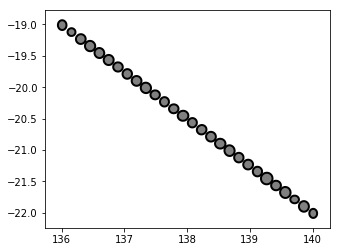

In [67]:
gpd_phtensor.plot(linewidth=2, facecolor='grey', edgecolor='black')

In [68]:
gpd_retip = shpobj.create_tipper_real_shp(allper[i],export_fig=True)[0]

gpd_imtip = shpobj.create_tipper_imag_shp(allper[i],export_fig=True)[0]

2018-10-31T12:47:40 - mtpy.core.edi_collection - INFO - Automatically Selected Max Tipper Length  = 0.185184444445
The plot period is  0.00023442267204807352
2018-10-31T12:47:41 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set
2018-10-31T12:47:41 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set
2018-10-31T12:47:41 - mtpy.core.edi_collection - INFO - Geopandas Dataframe CRS: {'init': 'epsg:4283', 'no_defs': True}
2018-10-31T12:47:41 - mtpy.utils.shapefiles_creator - INFO - saving figure to file c:/tmp20181023\Tipper_Real_EPSG_4283_Period_0.00023442267204807352s.jpg
2018-10-31T12:47:41 - mtpy.core.edi_collection - INFO - Automatically Selected Max-Tipper Length =: 0.185184444445
The plot period is  0.00023442267204807352
2018-10-31T12:47:41 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set
2018-10-31T12:47:41 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set
2018-10-31T12:47:41 - mtpy.core.edi_collection - INFO - Geopandas

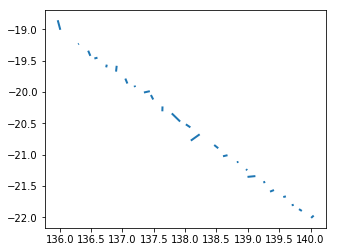

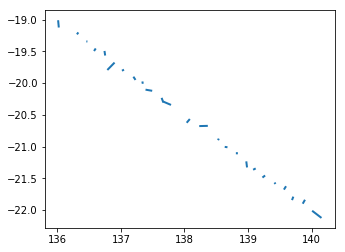

In [69]:
gpd_retip.plot()
gpd_imtip.plot()

In [70]:
gpd_retip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 15 columns):
azimuth       28 non-null float64
elliptic      28 non-null float64
lat           28 non-null float64
lon           28 non-null float64
n_skew        28 non-null float64
period        28 non-null float64
phi_max       28 non-null float64
phi_min       28 non-null float64
skew          28 non-null float64
station       28 non-null object
tip_ang_im    28 non-null float64
tip_ang_re    28 non-null float64
tip_mag_im    28 non-null float64
tip_mag_re    28 non-null float64
tip_re        28 non-null object
dtypes: float64(13), object(2)
memory usage: 3.4+ KB


In [71]:
gpd_retip.head()

,azimuth,elliptic,lat,lon,n_skew,period,phi_max,phi_min,skew,station,tip_ang_im,tip_ang_re,tip_mag_im,tip_mag_re,tip_re
0,-1.784894,0.064681,-19.010000,136.010000,0.215524,0.000234,54.024061,47.460012,0.107762,Synth00,84.621921,-105.041105,0.029297,0.084049,"LINESTRING (136.01 -19.01, 135.9690198338182 -..."
1,88.248535,0.011888,-19.121111,136.158147,-0.329109,0.000234,43.847595,42.817361,-0.164554,Synth01,-180.000000,-180.000000,0.000000,0.000000,LINESTRING (136.1581472222222 -19.121111111111...
2,39.699174,0.007851,-19.232222,136.306297,-1.754277,0.000234,54.164044,53.320199,-0.877138,Synth02,-53.678238,147.707648,0.009627,0.007652,LINESTRING (136.3062972222222 -19.232222222222...
3,-34.387702,0.010740,-19.343333,136.454444,-0.538646,0.000234,57.430328,56.209872,-0.269323,Synth03,4.872484,67.038625,0.004298,0.047345,LINESTRING (136.4544444444444 -19.343333333333...
4,-20.121680,0.019016,-19.454444,136.602592,-1.992582,0.000234,55.485587,53.414742,-0.996291,Synth04,124.129363,165.170440,0.012335,0.027150,LINESTRING (136.6025916666667 -19.454444444444...


In [72]:
import matplotlib.pyplot as plt
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

2018-10-31T12:47:42 - Fiona - WARNING - PROJ data files not located, PROJ_LIB not set


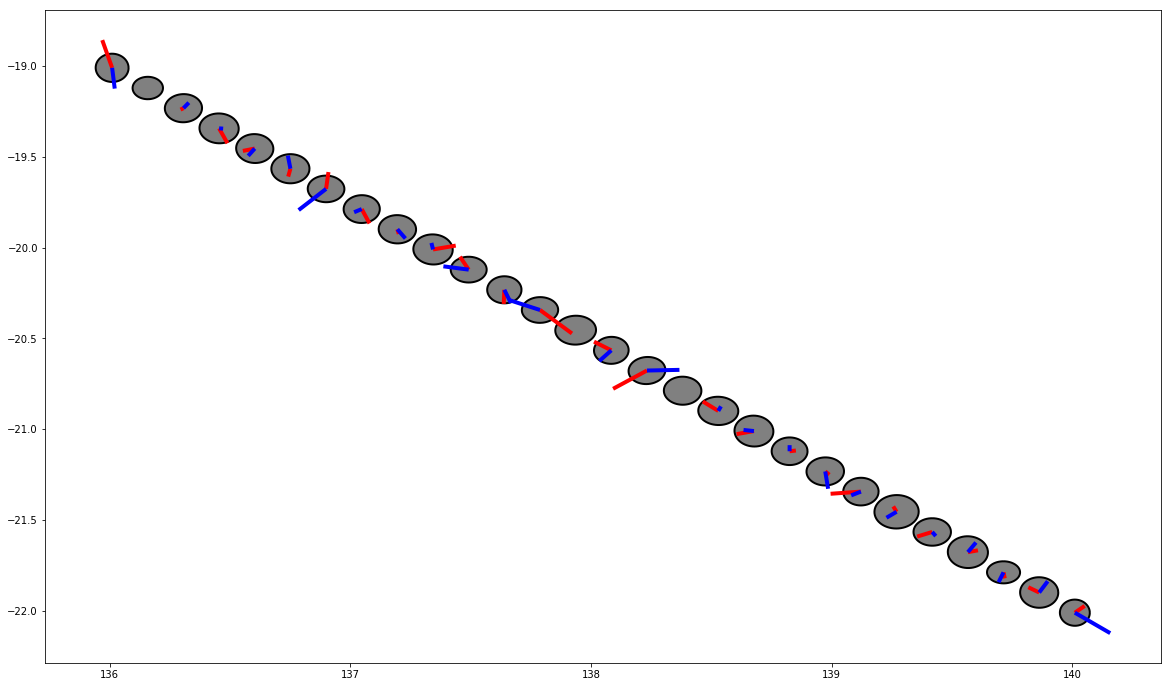

In [73]:
# composing two layers in a map
f, ax = plt.subplots(1, figsize=(20, 12))

# ax.set_xlim([140.5,141])
# ax.set_ylim([-21,-20])

# Add layer of polygons on the axis

#world.plot(ax=ax, alpha=0.5)  # background map
gpd_phtensor.plot(ax=ax, linewidth=2, facecolor='grey', edgecolor='black')
gpd_retip.plot(ax=ax, color='red', linewidth=4)
gpd_imtip.plot(ax=ax, color='blue', linewidth=4)
plt.savefig('phasetensor_tippers.png')

# Display
#plt.show()

In [74]:
print(gpd_imtip['tip_mag_im'].min(),gpd_imtip['tip_mag_im'].max())

(0.0, 0.04719733190160992)


In [75]:
print(gpd_retip['tip_mag_re'].min(), gpd_retip['tip_mag_re'].max())

(0.0, 0.09856445015354419)


In [76]:
shpobj.stations_distances

{'MAX_DIST': 5.0,
 'MIN_DIST': 0.18518444444524448,
 'Q1PERCENT': 0.18518444444526674,
 'Q2PERCENT': 0.18518444444526724,
 'Q3PERCENT': 0.18518444444528784}